In [294]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.io 
from scipy.io import loadmat  #for loading .mat files from matlab (loading a,b for the butter filter)                 
from scipy import signal
import librosa as lr 
import librosa.display 
import wave
from glob import glob  #for reading files
from math import pi
import math 
import numpy.ma as ma 
from scipy.io.wavfile import read

In [295]:
#set the path and use glob to read all files that match the end "*.wav"
# sample, data = read('/Users/ahmedabdalsattar/Desktop/finch_2020-08-10/2020-08-10_POI90.wav')
path_file = '/Users/ahmedabdalsattar/Desktop/finch_2020-08-10/'
wave_files = glob('*.wav') 

In [296]:
"""These two function find the time length of each *wave. file and take the mean value 
to find the average time of birdsong in each session
* one function find RMS and MEAN 
* second function SUM periods of songs and take mean value"""

length_time = []
def average_time(x):
    for i in range(len(x)):
        audio_files,sampling_rate = lr.load(x[i])
        Duaration = len(audio_files)/sampling_rate 
        length_time.append(Duaration)

wav_files = average_time(wave_files)

#RMS to find the acverage length of the time (do we need to use RMS or just average it)
def RMS_value(y):
    # intiate the coeffieciants for [square,mean,root]
    square = 0.0 
    mean = 0.0
    root = 0.0 
    for i in range (0,len(y)):
        square += (y[i]**2)
    mean = square / (float)(len(y))
    rms = math.sqrt(mean)  
    return rms,mean

def total_length_time(t):
    SUM = sum(t)/len(wave_files)
    return SUM 

Root_mean_square = RMS_value(length_time)
Total_time_length = total_length_time(length_time)
# print('[RMS,MEAN] = ' + str(Root_mean_square))
# print('Mean Time songs of one session = ' +  str(Total_time_length))

In [297]:
#find the time period of each wave file (length of time)
Duaration = len(audio_files)/sampling_rate 
Time = np.arange(0,Duaration,1/sampling_rate)

# 'Observe Some Data'
# print('Time period of the song (Duaration) = ' , Duaration)
# print('sample rate original = ' , sampling_rate)
# print('array represent samples = ', audio_files)
# print('Total number of sample frequency in the array for this song = ', len(audio_files))
# print('array represent the vector of time = \n', Time) # plt.plot(Time,audio_files)

In [298]:
"""load the files using librosa with a sampling frequency.
the sampling rate here is meant the Nyquist frequency which is 15000, 
which makes the sample frequency we use for birdsongs is 30000Hz """

audio_files,sampling_rate = lr.load(wave_files[5],15000)

In [299]:
# # plot a spectrogram and power form of the audio. 

# lr.feature.melspectrogram(y=audio_files, sr=sampling_rate, S=None, n_fft=15000, hop_length=32, power=2.0)
# X = lr.stft(audio_files)
# Xdb = lr.amplitude_to_db(np.abs(X))
# plt.figure()
# lr.display.specshow(Xdb, sr=22050, x_axis='time', y_axis='hz')
# plt.colorbar()
# plt.figure()
# plt.plot(audio_files)

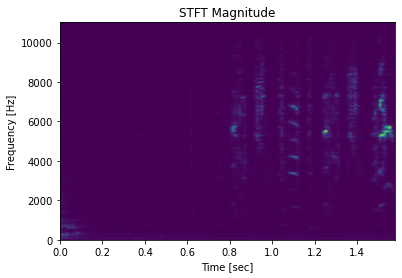

"another way is by using pd:\n\nimport pandas as pd\nhop_length = 512\nwindow_size = 1024\n\n\nwindow = np.hanning(window_size)\nspect  = librosa.core.spectrum.stft(y = audio_files, n_fft = window_size, hop_length = hop_length, \n       window=window)\nspect = 2 * np.abs(out) / np.sum(window)\n\nlibrosa.display.specshow(librosa.amplitude_to_db(out,ref=np.max),\n               y_axis='log', x_axis='time')\n\n"

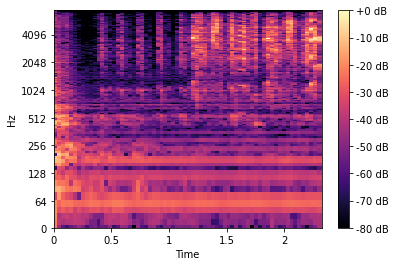

In [300]:
sampling_rate = 22050
f, t, Zxx = signal.stft(audio_files, sampling_rate,window = 'hann', nperseg=512 )
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


"""Spectrogram and short-Time Foriour Transform. log was applied to make the spectrogram more visible"""
fig = plt.figure()
Length = 512
D = np.abs(librosa.stft(audio_files, n_fft=1024,  hop_length=Length))
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=15000, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

#the Use savefig to save the spectrogram as a .png file to further save it as a binary file.
fig.savefig('spect.png')


"""another way is by using pd:

import pandas as pd
hop_length = 512
window_size = 1024


window = np.hanning(window_size)
spect  = librosa.core.spectrum.stft(y = audio_files, n_fft = window_size, hop_length = hop_length, 
       window=window)
spect = 2 * np.abs(out) / np.sum(window)

librosa.display.specshow(librosa.amplitude_to_db(out,ref=np.max),
               y_axis='log', x_axis='time')

"""

In [301]:
#convert the spectrogram .png file to a binary file and save it. 

path = '/Users/ahmedabdalsattar/Desktop/finch_2020-08-10/spect1.png'
file = open(path,'rb')
# file = open(path,'wb')
read_file = file.read()
# print(read_file)
# print(len(read_file))
file.close()

In [302]:
"""Next step:
- is to create a for loop to run all files in the session
- find stft for all 
- save all in one pdf or png files 
- convert them into binary files 
- save data and prepare it for ML training"""

'Next step:\n- is to create a for loop to run all files in the session\n- find stft for all \n- save all in one pdf or png files \n- convert them into binary files \n- save data and prepare it for ML training'